# Generate full emissions portfolio from projected Kyoto gas baskets
Updated to include announcements as of COP26, 5/11/21. Including an analysis of full impact of Net Zero commitments on emissions.

NOTE: Most of this file is unnecessary - only the file sr15_cleaned.csv is needed from this!

# Part 1: import and clean data

In [1]:
import sys
stdout = sys.stdout

In [2]:
import country_converter
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import pyam
import re
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
from silicone.utils import download_or_load_sr15, convert_units_to_MtCO2_equiv, _construct_consistent_values

In [4]:
version_no = "r10_5"

# Import the data
Data is imported and put into pyam format. Names of regions are unified. Units of measurements are defined and cleaned. 

In [5]:
variable = "Emissions|Kyoto Gases (AR6-GWP100)"
metricname = "AR6GWP100"
kyexaf = variable + "|Excluding CO2 AFOLU"
unit = "Mt CO2-equiv/yr"
co2unit = "Mt CO2/yr"

In [6]:
metadata = pd.read_excel(
    "../input/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx", sheet_name="meta"
).rename(columns={"Model": "model", "Scenario": "scenario"}).set_index(["model", "scenario"])

In [7]:
ar6 = pyam.IamDataFrame("../input/AR6_Scenarios_Database_World_v1.1.csv", meta=metadata)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ..\input\AR6_Scenarios_Database_World_v1.1.csv


In [8]:
ar6.filter(variable="Prima*").variable

['Primary Energy',
 'Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Coal|w/ CCS',
 'Primary Energy|Coal|w/o CCS',
 'Primary Energy|Fossil',
 'Primary Energy|Fossil|w/ CCS',
 'Primary Energy|Fossil|w/o CCS',
 'Primary Energy|Gas',
 'Primary Energy|Gas|w/ CCS',
 'Primary Energy|Gas|w/o CCS',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Oil|w/ CCS',
 'Primary Energy|Oil|w/o CCS',
 'Primary Energy|Other',
 'Primary Energy|Renewables (incl. Biomass)',
 'Primary Energy|Secondary Energy Trade',
 'Primary Energy|Biomass|Modern|w/o CCS',
 'Primary Energy|Geothermal',
 'Primary Energy|Hydro',
 'Primary Energy|Solar',
 'Primary Energy|Wind',
 'Primary Energy|Biomass|Modern|w/ CCS',
 'Primary Energy|Biomass|1st Generation',
 'Primary Energy|Biomass|Electricity',
 'Primary Energy|Biomass|Electricity|w/ CCS',
 'Primary Energy|Biomass|Electricity|w/o CCS',
 'Primary Energy|Biomass|Energy Crops',
 'Primary Energy|Biomas

<AxesSubplot:title={'center':'model: TIAM-Grantham 3.2 - region: World - variable: Primary Energy|Fossil'}, xlabel='Year', ylabel='EJ/yr'>

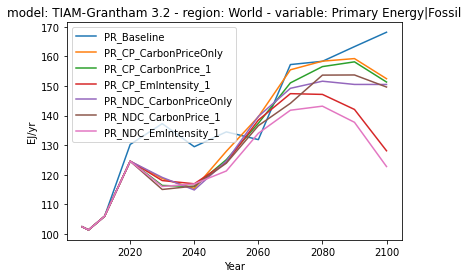

In [9]:
ar6.filter(variable="Primary Energy|Fossil").filter(model="TIAM-Grantham*", scenario="PR_*").plot()

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Fossil'}, xlabel='Year', ylabel='EJ/yr'>

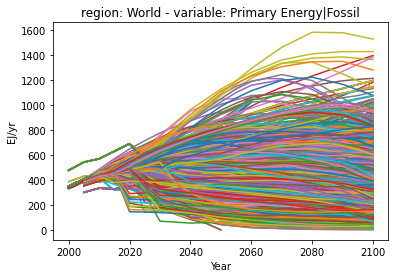

In [10]:
ar6.filter(variable="Primary Energy|Fossil").filter(model="Global TIMES 2.0", keep=False).filter(
    model="TIAM-Grantham*", scenario="PR_*", keep=False).plot()

In [11]:
ar6.filter(variable="Primary Energy|Fossil").filter(Category=["C1", "C2"]).timeseries().sort_values(by=2020,ascending=False)

2005  \
model                     scenario                   region variable              unit                
MESSAGEix-GLOBIOM_GEI 1.0 SSP2_openres_lc_CB600      World  Primary Energy|Fossil EJ/yr  543.389224   
                          SSP2_int_mc_50             World  Primary Energy|Fossil EJ/yr  543.389224   
                          SSP2_openres_lc_100        World  Primary Energy|Fossil EJ/yr  543.389224   
                          SSP2_openres_lc_120        World  Primary Energy|Fossil EJ/yr  543.389224   
                          SSP2_openres_lc_80         World  Primary Energy|Fossil EJ/yr  543.389224   
...                                                                                             ...   
REMIND-MAgPIE 2.1-4.2     EN_INDCi2030_600f_COV      World  Primary Energy|Fossil EJ/yr  383.499600   
                          EN_INDCi2030_600f_COV_NDCp World  Primary Energy|Fossil EJ/yr  383.499600   
                          EN_NPi2020_600f_COV        World  Primary Energy|Fossil EJ/yr  383.499600   
                          EN_INDCi2030_600_COV_NDCp  World  Primary Energy|Fossil EJ/yr  383.499600   
                          EN_NPi2020_600_COV         World  Primary Energy|Fossil EJ/yr  383.499600   

                                                                                              2010  \
model                     scenario                   region variable              unit               
MESSAGEix-GLOBIOM_GEI 1.0 SSP2_openres_lc_CB600      World  Primary Energy|Fossil EJ/yr  570.34181   
                          SSP2_int_mc_50             World  Primary Energy|Fossil EJ/yr  570.34181   
                          SSP2_openres_lc_100        World  Primary Energy|Fossil EJ/yr  570.34181   
                          SSP2_openres_lc_120        World  Primary Energy|Fossil EJ/yr  570.34181   
                          SSP2_openres_lc_80         World  Primary Energy|Fossil EJ/yr  570.34181   
...                                                                                            ...   
REMIND-MAgPIE 2.1-4.2     EN_INDCi2030_600f_COV      World  Primary Energy|Fossil EJ/yr  423.10520   
                          EN_INDCi2030_600f_COV_NDCp World  Primary Energy|Fossil EJ/yr  423.10520   
                          EN_NPi2020_600f_COV        World  Primary Energy|Fossil EJ/yr  423.10520   
                          EN_INDCi2030_600_COV_NDCp  World  Primary Energy|Fossil EJ/yr  423.10520   
                          EN_NPi2020_600_COV         World  Primary Energy|Fossil EJ/yr  423.10520   

                                                                                             2015  \
model                     scenario                   region variable              unit              
MESSAGEix-GLOBIOM_GEI 1.0 SSP2_openres_lc_CB600      World  Primary Energy|Fossil EJ/yr       NaN   
                          SSP2_int_mc_50             World  Primary Energy|Fossil EJ/yr       NaN   
                          SSP2_openres_lc_100        World  Primary Energy|Fossil EJ/yr       NaN   
                          SSP2_openres_lc_120        World  Primary Energy|Fossil EJ/yr       NaN   
                          SSP2_openres_lc_80         World  Primary Energy|Fossil EJ/yr       NaN   
...                                                                                           ...   
REMIND-MAgPIE 2.1-4.2     EN_INDCi2030_600f_COV      World  Primary Energy|Fossil EJ/yr  441.8856   
                          EN_INDCi2030_600f_COV_NDCp World  Primary Energy|Fossil EJ/yr  441.8856   
                          EN_NPi2020_600f_COV        World  Primary Energy|Fossil EJ/yr  441.8856   
                          EN_INDCi2030_600_COV_NDCp  World  Primary Energy|Fossil EJ/yr  441.8856   
                          EN_NPi2020_600_COV         World  Primary Energy|Fossil EJ/yr  441.8856   

                                                                                               2020  \
model      

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Renewables (incl. Biomass)'}, xlabel='Year', ylabel='EJ/yr'>

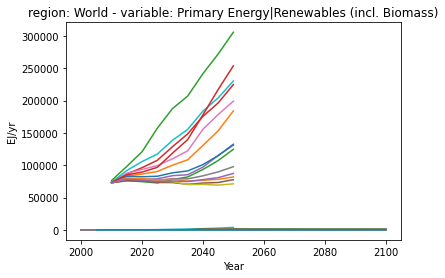

In [12]:
ar6.filter(variable="Primary Energy|Renewables (incl. Biomass)").plot()

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Renewables (incl. Biomass)'}, xlabel='Year', ylabel='EJ/yr'>

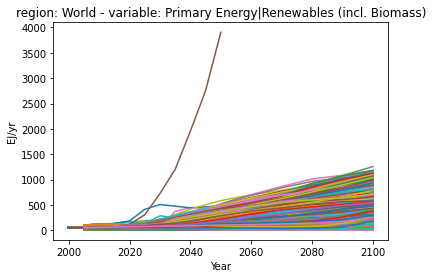

In [13]:
ar6.filter(variable="Primary Energy|Renewables (incl. Biomass)").filter(model="Global TIMES 2.0", keep=False).filter(
    model="TIAM-Grantham*", scenario="PR_*", keep=False).plot()

In [14]:
ar6.meta.Category.unique()

array(['failed-vetting', 'C3', 'C5', 'C6', 'C7', 'C4', 'C1',
       'no-climate-assessment', 'C2', 'C8'], dtype=object)

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Fossil'}, xlabel='Year', ylabel='EJ/yr'>

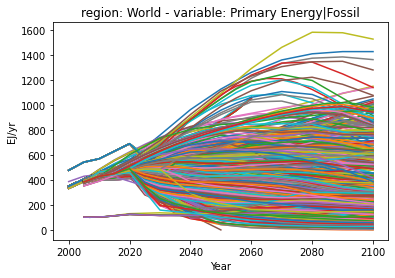

In [15]:
fossil = "Primary Energy|Fossil"
ren = "Primary Energy|Renewables (incl. Biomass)"
ar6.filter(variable=fossil).filter(Category="failed-vetting", keep=False).plot()

pyam.plotting - INFO: >=13 labels, not applying legend


Text(0.5, 1.0, 'Fossil energy in C1-C4 scenarios (50% <2C)')

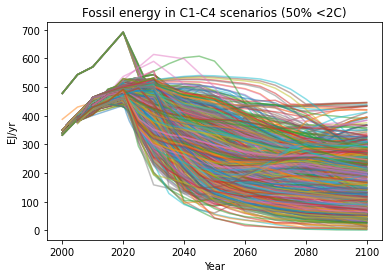

In [16]:
ar6.filter(variable="Primary Energy|Fossil").filter(Category=["C1", "C2", "C3", "C4"]).plot(alpha=0.5)
plt.title("Fossil energy in C1-C4 scenarios (50% <2C)")

pyam.plotting - INFO: >=13 labels, not applying legend


Text(0.5, 1.0, 'Renewable energy in C1-C4 scenarios (50% <2C)')

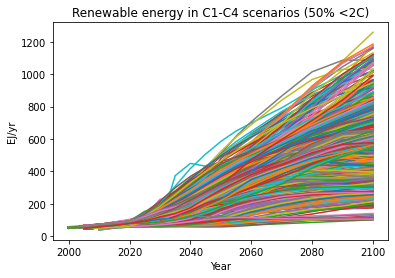

In [17]:
ar6.filter(variable=ren).filter(Category=["C1", "C2", "C3", "C4"]).plot()
plt.title("Renewable energy in C1-C4 scenarios (50% <2C)")

In [18]:
fossilc12 = ar6.filter(variable=fossil).filter(Category=["C1", "C2"]).timeseries()
renc12 = ar6.filter(variable=ren).filter(Category=["C1", "C2"]).timeseries()

In [19]:
fossilc12["ratio2050-2020"] = fossilc12[2050] / fossilc12[2020]
renc12["ratio2050-2020"] = renc12[2050] / renc12[2020]

In [20]:
fossilc123 = ar6.filter(variable=fossil).filter(Category=["C1", "C2", "C3", "C4"]).timeseries()
renc123 = ar6.filter(variable=ren).filter(Category=["C1", "C2", "C3", "C4"]).timeseries()

In [21]:
fossilc123["ratio2050-2020"] = fossilc123[2050] / fossilc123[2020]
renc123["ratio2050-2020"] = renc123[2050] / renc123[2020]

In [22]:
renc123["ratio2050-2020"].median()

3.2732845928008

In [23]:
fossilc123["ratio2050-2020"].median()

0.5572495378566298

<AxesSubplot:xlabel='ratio2050-2020', ylabel='Density'>

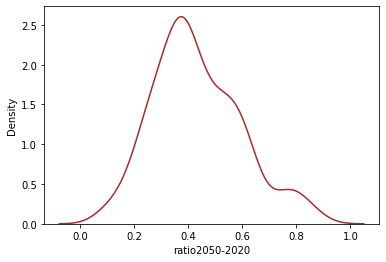

In [24]:
sns.kdeplot(fossilc12["ratio2050-2020"], color="brown")

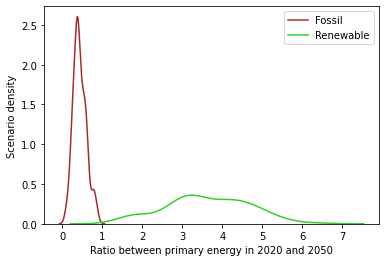

In [25]:
plt.figure()
ax = plt.subplot()
sns.kdeplot(fossilc12["ratio2050-2020"], ax=ax,  color="brown")
sns.kdeplot(renc12["ratio2050-2020"], ax=ax, color="limegreen")
plt.xlabel("Ratio between primary energy in 2020 and 2050")
plt.ylabel("Scenario density")
plt.legend(["Fossil", "Renewable"])

Text(0.5, 0.9, 'C1-C4 scenarios (50% <2C)')

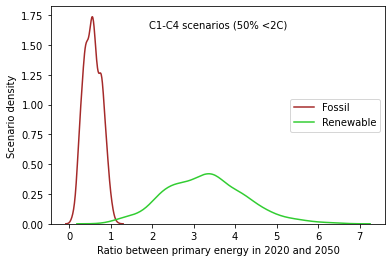

In [26]:
plt.figure()
ax = plt.subplot()
sns.kdeplot(fossilc123["ratio2050-2020"], ax=ax,  color="brown")
sns.kdeplot(renc123["ratio2050-2020"], ax=ax, color="limegreen")
plt.xlabel("Ratio between primary energy in 2020 and 2050")
plt.ylabel("Scenario density")
plt.legend(["Fossil", "Renewable"], loc="center right")
plt.text(0.5, 0.9, "C1-C4 scenarios (50% <2C)", horizontalalignment="center", transform=ax.transAxes)

In [40]:
sum(fossilc123["ratio2050-2020"] < 1) / len(fossilc123["ratio2050-2020"])

0.9855907780979827

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Renewables (incl. Biomass)'}, xlabel='Year', ylabel='EJ/yr'>

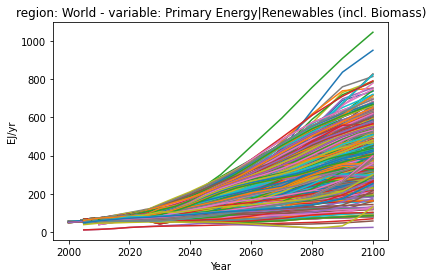

In [27]:
ar6.filter(variable=ren).filter(Category=["C5", "C6", "C7", "C8"]).plot()

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Fossil'}, xlabel='Year', ylabel='EJ/yr'>

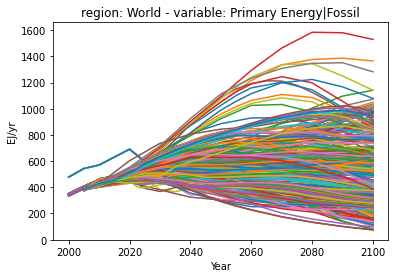

In [28]:
ar6.filter(variable="Primary Energy|Fossil").filter(Category=["C5", "C6", "C7", "C8"]).plot()

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Renewables (incl. Biomass)'}, xlabel='Year', ylabel='EJ/yr'>

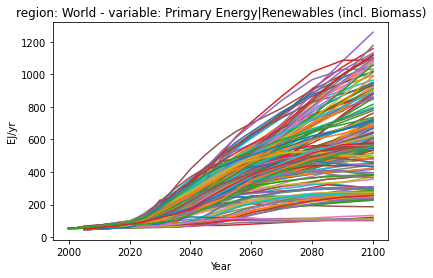

In [29]:
ar6.filter(Category=["C1", "C2"]).filter(variable=ren).plot()

In [30]:
fossilc678 = ar6.filter(variable=fossil).filter(Category=["C6", "C7", "C8"]).timeseries()
renc678 = ar6.filter(variable=ren).filter(Category=["C6", "C7", "C8"]).timeseries()

In [34]:
fossilc5678 = ar6.filter(variable=fossil).filter(Category=["C5", "C6", "C7", "C8"]).timeseries()
renc5678 = ar6.filter(variable=ren).filter(Category=["C5", "C6", "C7", "C8"]).timeseries()

In [31]:
fossilc678["ratio2050-2020"] = fossilc678[2050] / fossilc678[2020]
renc678["ratio2050-2020"] = renc678[2050] / renc678[2020]

In [35]:
fossilc5678["ratio2050-2020"] = fossilc5678[2050] / fossilc5678[2020]
renc5678["ratio2050-2020"] = renc5678[2050] / renc5678[2020]

In [36]:
fossilc5678["ratio2050-2020"].median()

1.1045545194428255

In [37]:
renc5678["ratio2050-2020"].median()

1.9921789951271995

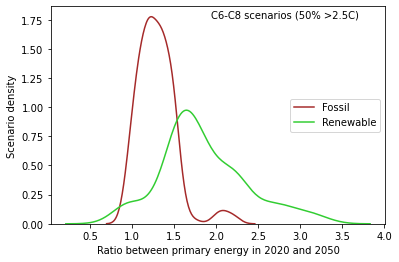

In [32]:
plt.figure()
ax = plt.subplot()
sns.kdeplot(fossilc678["ratio2050-2020"], ax=ax,  color="brown")
sns.kdeplot(renc678["ratio2050-2020"], ax=ax, color="limegreen")
plt.xlabel("Ratio between primary energy in 2020 and 2050")
plt.ylabel("Scenario density")
plt.text(0.7, 0.95, "C6-C8 scenarios (50% >2.5C)", horizontalalignment="center", transform=ax.transAxes)
plt.legend(["Fossil", "Renewable"], loc="center right")